# Linear Regression

In [1]:
#Importing all the necessary Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


## Loading the Raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing the Raw data 

### Exploring the descriptive statistics of the variable

In [4]:
raw_data.describe(include='all')
#first thing to notice is each variable has different number of observation. Hence, there are some missing values
#second thing is unique entries for categorical varibales, and there are more than 312 unique entries for model which means 
#more than 300 dummies
#The registration coloumn has more almost 3947 'Yes' entries, so the feature won't tell much, we will drop it  

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variable of interest

In [5]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with Missing values

In [6]:
#Price and EngineV are the only coloumn with missing values 
#if you are removing observation <5% than you are free to remove all that have missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv = data.dropna(axis = 0)

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

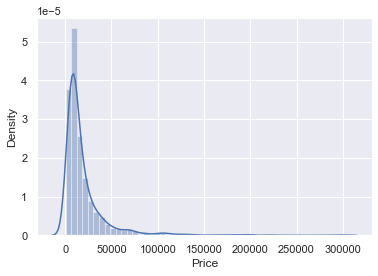

In [9]:
#we would be looking for Normal Distribution for Optimal results
sns.distplot(data_no_mv['Price'])

### Dealing with the Outliers

In [10]:
# we have removed the top 1% Outliers casuing the problem 
q = data_no_mv['Price'].quantile(0.99)
data1 = data_no_mv[data_no_mv['Price']<q]
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


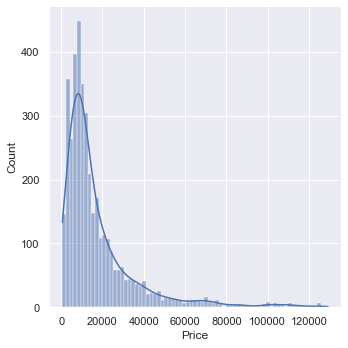

In [11]:
sns.displot(data1['Price'] , kde =True)

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

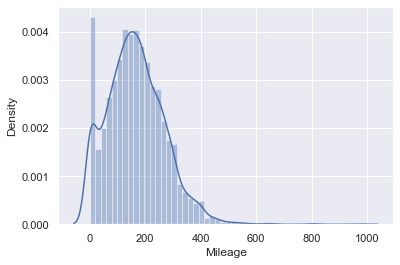

In [12]:
# Similar problem is with the Mileage
sns.distplot(data1['Mileage'])

In [13]:
q = data1['Mileage'].quantile(0.99)
data2 = data1[data1['Mileage'] <q]
data2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

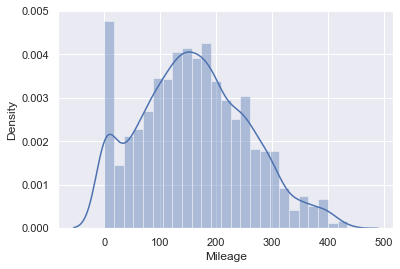

In [14]:
sns.distplot(data2['Mileage'])

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

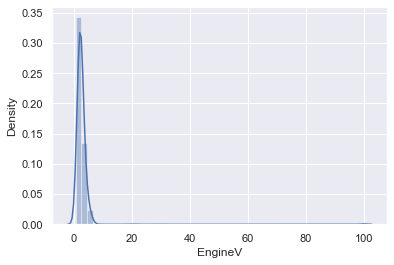

In [15]:
#if you exolore the engine value it is unusal at the end 
sns.distplot(data2['EngineV'])

In [16]:
EngV = pd.DataFrame(data2['EngineV'])
EngV.sort_values(by = 'EngineV')

,EngineV
2512,0.60
188,0.65
2214,1.00
2196,1.00
1923,1.00
...,...
256,99.99
1264,99.99
3114,99.99
2349,99.99


In [17]:
data3 = data2[data2['EngineV']< 6.5]

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

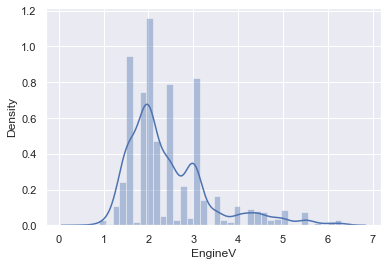

In [18]:
sns.distplot(data3['EngineV'])

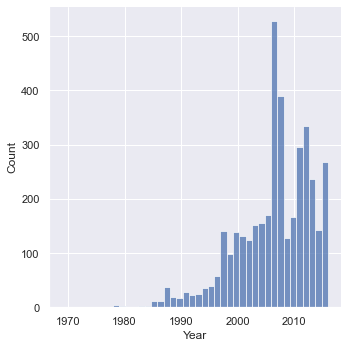

In [19]:
# Problem with the Year is with low end
sns.displot(data3['Year'])

In [20]:
q = data3['Year'].quantile(0.11)
data4 = data3[data3['Year'] > q ]

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

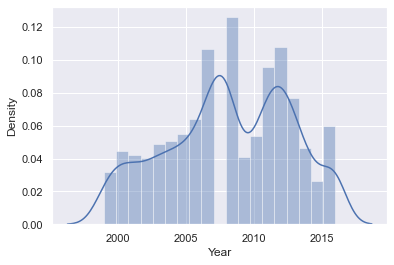

In [21]:
sns.distplot(data4['Year'])

In [22]:
#Now we create a varibel of clean data by resetting the index
data_cleaned = data4.reset_index(drop =  True)

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3459,3459.000000,3459,3459.000000,3459.000000,3459,3459,3459.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,762,NaN,1207,NaN,NaN,1698,3170,NaN
mean,NaN,19798.156652,NaN,147.932639,2.464053,NaN,NaN,2008.148598
std,NaN,19542.540521,NaN,86.691460,0.972008,NaN,NaN,4.575174
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,1999.000000
25%,NaN,8400.000000,NaN,85.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12850.000000,NaN,148.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,23500.000000,NaN,205.000000,3.000000,NaN,NaN,2012.000000


### `Checking OLS assumptions

Text(0.5, 1.0, 'Mileage and Price')

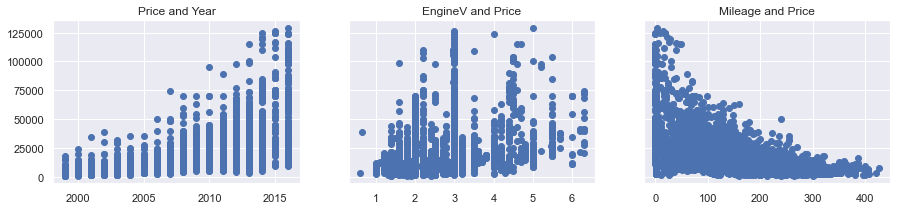

In [24]:
f, (ax1,ax2,ax3) = plt.subplots(1,3 , sharey= True, figsize = (15,3)) 
ax1.scatter(data_cleaned['Year'] , data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'] , data_cleaned['Price'])
ax2.set_title('EngineV and Price')
ax3.scatter(data_cleaned['Mileage'] , data_cleaned['Price'])
ax3.set_title('Mileage and Price')

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

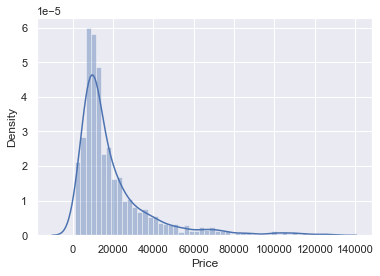

In [25]:
# Price is not Normally Distributed, one way is to take the log of the Price and compare as above
sns.distplot(data_cleaned['Price'])

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log_Price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3454,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3455,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3456,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3457,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'Mileage and Price')

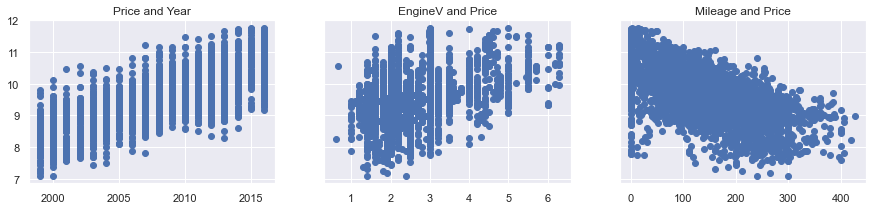

In [27]:
f, (ax1,ax2,ax3) = plt.subplots(1,3 , sharey= True, figsize = (15,3)) 
ax1.scatter(data_cleaned['Year'] , data_cleaned['Log_Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'] , data_cleaned['Log_Price'])
ax2.set_title('EngineV and Price')
ax3.scatter(data_cleaned['Mileage'] , data_cleaned['Log_Price'])
ax3.set_title('Mileage and Price')

In [28]:
# we will drop the Price coloumn, since it is no longer needed
data_cleaned = data_cleaned.drop(['Price'] , axis=1)

### Multicollinearity

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_Price'], dtype=object)

In [30]:
# it is logical that year and mileage are going to be correlated, Newer the car lower its milage. Hence, we can expect some 
# of Multicollinearity in the data
# we dont have any module to check the multicollineaity in Sklearn. So we will deal it with stats 
# model using Variaton Inflation Factor(VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [ variance_inflation_factor(variables.values , i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [31]:
vif

,VIF,features
0,3.891813,Mileage
1,10.133661,Year
2,7.424041,EngineV


In [32]:
 # vif of 1 : No Multicollinerity , 1< Vif <5 : Perfectly okay , 6 <Vif : unacceptable
# However it difficult for all the variables to have Vif below 5, sometimes vif below 10 is also acceptabe, so we will only remove year
data_with_no_multicollinearity = data_cleaned.drop(['Year'] , axis=1)

In [33]:
data_with_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
1,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
2,Audi,crossover,240,4.2,Petrol,yes,10.043249
3,Toyota,crossover,120,2.0,Petrol,yes,9.814656
4,Audi,vagon,200,2.7,Diesel,yes,9.560997
...,...,...,...,...,...,...,...
3454,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3455,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3456,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3457,BMW,sedan,1,3.5,Petrol,yes,8.779557


### Creating Dummies Variables

In [34]:
data_with_dummies = pd.get_dummies(data_with_no_multicollinearity , drop_first=True)

In [35]:
data_with_dummies.head()

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Rearrange a bit

In [36]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [37]:
cols = ['Log_Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [38]:
data_preprocessed = data_with_dummies[cols]

In [39]:
data_preprocessed.head(6)

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


## Linear Regression Model

### Declare the Inputs and targets

In [40]:
targets = data_preprocessed['Log_Price']
Inputs = data_preprocessed.drop(['Log_Price'] , axis=1)

### scale the data

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Inputs)

StandardScaler()

In [42]:
Inputs_scaled = scaler.transform(Inputs)

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Inputs_scaled, targets , test_size=0.2, random_state=365)

### Create the regression

In [44]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
y_hat = reg.predict(x_train)

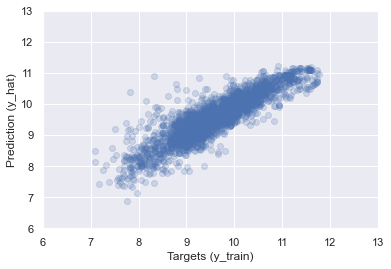

In [64]:
plt.scatter(y_train , y_hat, alpha=0.2)
plt.xlabel('Targets (y_train)')
plt.ylabel('Prediction (y_hat)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

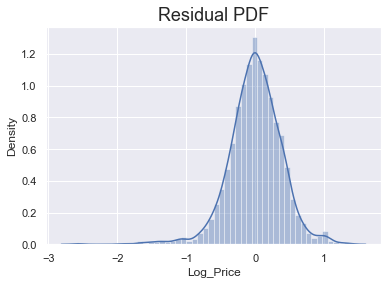

In [47]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [48]:
# calculting R_squared which explains 77% varaibility of the data
reg.score(x_train,y_train)

0.7781436482528401

### Finding the weight and bias

In [49]:
reg.intercept_

9.549125860257886

In [50]:
reg.coef_

array([-0.41094084,  0.20745738,  0.02768142,  0.01023398, -0.15423537,
       -0.20660834, -0.07549277, -0.0914711 , -0.12790568, -0.09171446,
       -0.14699288, -0.10769341, -0.16128384, -0.09890293, -0.02971824,
       -0.14300024,  0.30352601])

In [56]:
# positive weight shows as the feature increases in value, so as the price and the log price
reg_summary = pd.DataFrame(Inputs.columns.values, columns= ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.410941
1,EngineV,0.207457
2,Brand_BMW,0.027681
3,Brand_Mercedes-Benz,0.010234
4,Brand_Mitsubishi,-0.154235
5,Brand_Renault,-0.206608
6,Brand_Toyota,-0.075493
7,Brand_Volkswagen,-0.091471
8,Body_hatch,-0.127906
9,Body_other,-0.091714


In [58]:
# a positive weight shows that the respective category(brand) is more expensive than the benchmark Audi
# the bigger the weight, the bigger the impact
# it is also wrothnote taking that it doesn't make sense to compare the contionous variables with the dummies
# dummies are compared with benchmark dummies for the respective descrete variables
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

## Testing

In [59]:
y_hat_test = reg.predict(x_test)

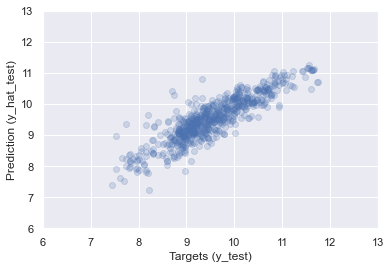

In [63]:
plt.scatter(y_test , y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Prediction (y_hat_test)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [67]:
#taking exponential of the log price will give the actual price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions']) 
df_pf

,Predictions
0,15846.309072
1,22696.438159
2,12850.899046
3,3520.556716
4,20347.016266
...,...
687,3963.328108
688,23386.351046
689,3780.737538
690,37630.111129


In [97]:
index = y_test['index']

In [98]:
y_test.set_index(index)

,level_0,index,Log_Price
index,,,
1416,0,1416,9.989665
2989,1,2989,10.373491
1048,2,1048,9.047704
1848,3,1848,8.594154
991,4,991,10.257659
...,...,...,...
3190,687,3190,8.802372
186,688,186,10.410305
1834,689,1834,8.006368


In [103]:
y_test.drop(['level_0','index'],axis=1,inplace=True)

In [104]:
df_pf['Target'] = np.exp(y_test) 
df_pf.head()

,Predictions,Target
0,15846.309072,21800.0
1,22696.438159,32000.0
2,12850.899046,8499.0
3,3520.556716,5400.0
4,20347.016266,28500.0


In [106]:
df_pf['Residual']=df_pf['Target']-df_pf['Predictions']

In [107]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [109]:
df_pf.describe(include='all')

,Predictions,Target,Residual,Difference%
count,692.000000,692.000000,692.000000,692.000000
mean,17512.265319,19243.825448,1731.560129,31.774325
std,13126.671431,19390.750145,10074.417582,41.452694
min,1389.031233,1700.000000,-37755.329557,0.175601
25%,8704.058334,8200.000000,-2655.197802,11.739026
50%,13408.321043,12450.000000,55.963934,24.197981
75%,22704.891474,22900.000000,3390.086276,38.242843
max,77009.441048,126000.000000,80800.315250,462.443212


In [110]:
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
606,14474.537792,14500.0,25.462208,0.175601
58,11025.224715,11000.0,-25.224715,0.229316
561,7676.554024,7650.0,-26.554024,0.347111
293,13748.385042,13700.0,-48.385042,0.353175
439,15929.797324,16000.0,70.202676,0.438767
...,...,...,...,...
479,15439.377045,3600.0,-11839.377045,328.871585
491,48955.329557,11200.0,-37755.329557,337.101157
139,29906.909603,6300.0,-23606.909603,374.712851
138,11648.497006,2300.0,-9348.497006,406.456392
